Ce notebook a pour but d'essayer de voir ou on pourrait mettre du stockage dans le réseau "cible" pour la compétition, et aussi (surtout) pour la thèse d'Eva.

In [1]:
import numpy as np
import os
import pandas as pd
import grid2op
from grid2op.Chronics import ChangeNothing
from chronix2grid.kpi.Generator_parameter_checker import EnergyMix_AprioriChecker
import plotly
import plotly.graph_objects as go
from grid2op.PlotGrid import NUKE_COLOR, THERMAL_COLOR, WIND_COLOR, SOLAR_COLOR, HYDRO_COLOR
import json
import copy

# for pandas interactive plots
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

/home/donnotben/Documents/grid2op_dev/grid2op/Backend/PandaPowerBackend.py:30: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	/home/donnotben/Documents/chronix2grid_gaetan/venv/bin/python -m pip install numba

  warnings.warn("Numba cannot be loaded. You will gain possibly massive speed if installing it by "


In [2]:
env_name = "case118_l2rpn_wcci_benjamin"
path_ref = os.path.join("..", "example", "input", "generation")
input_path = os.path.join(path_ref, env_name)
grid_path = os.path.join(input_path, "grid.json")
env = grid2op.make(
    input_path,
    test=True,
    grid_path=grid_path, # assign it the 118 grid
    chronics_class=ChangeNothing, # tell it to change nothing (not the most usable environment...)
)

Le réseau en général

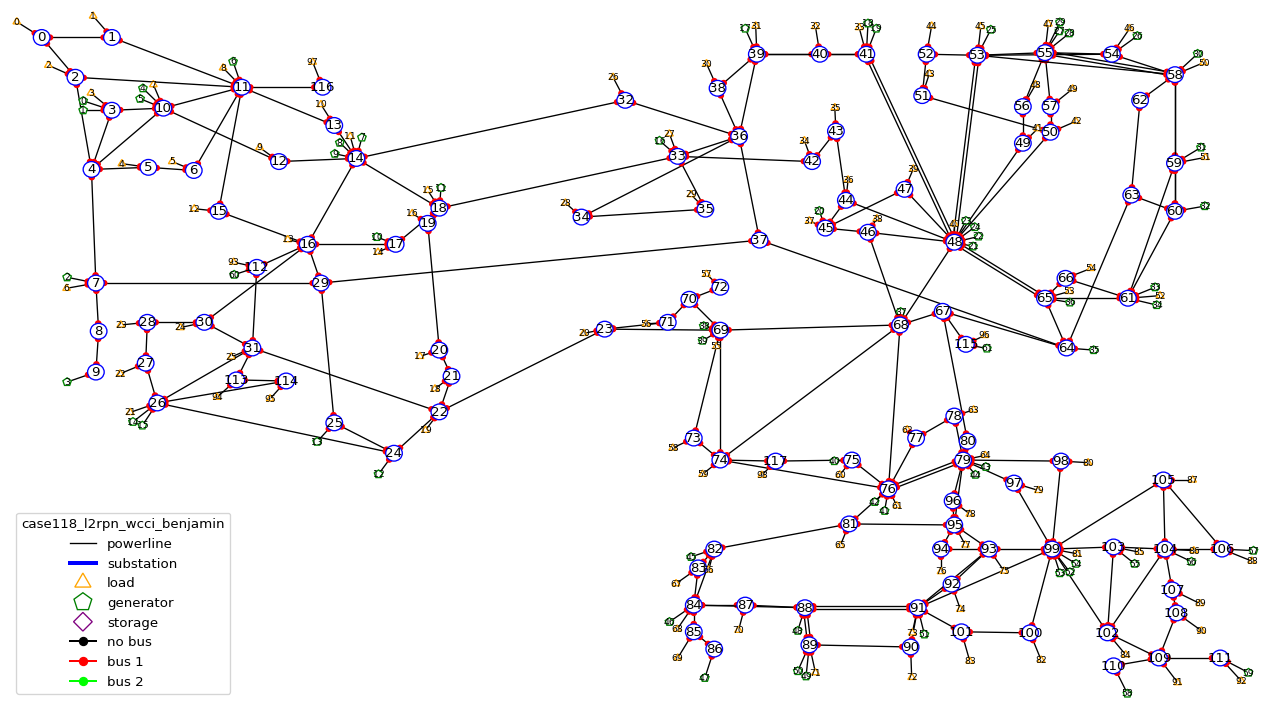

In [3]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(env)
_ = plot_helper.plot_layout()

Le niveau de tension des lignes (2 niveaux de tension, 135 et 350.)

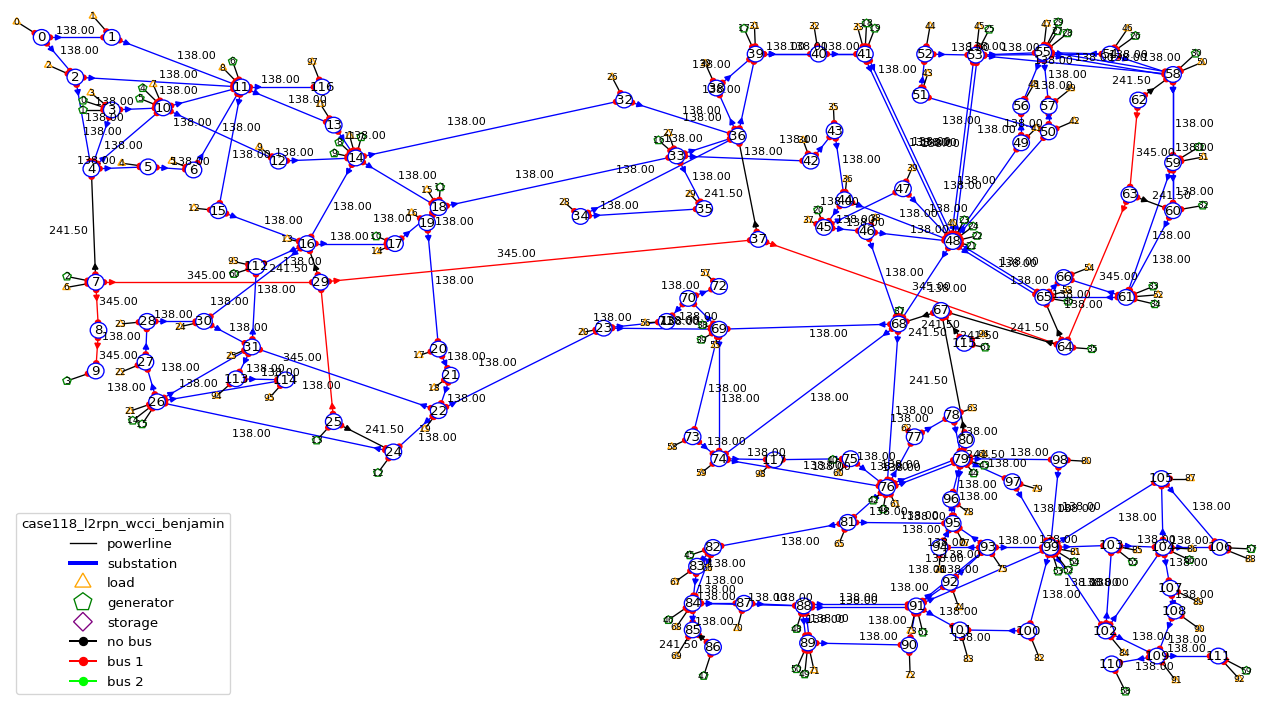

In [11]:
plot_helper.assign_line_palette(line_color_scheme=["blue", "black", "red"])
lines_info = env.backend.lines_or_pu_to_kv
lines_info[env.backend.lines_ex_pu_to_kv != lines_info] = (345 + 138) * 0.5
_ = plot_helper.plot_info(line_values=env.backend.lines_or_pu_to_kv, coloring="line")

Les types de générateurs

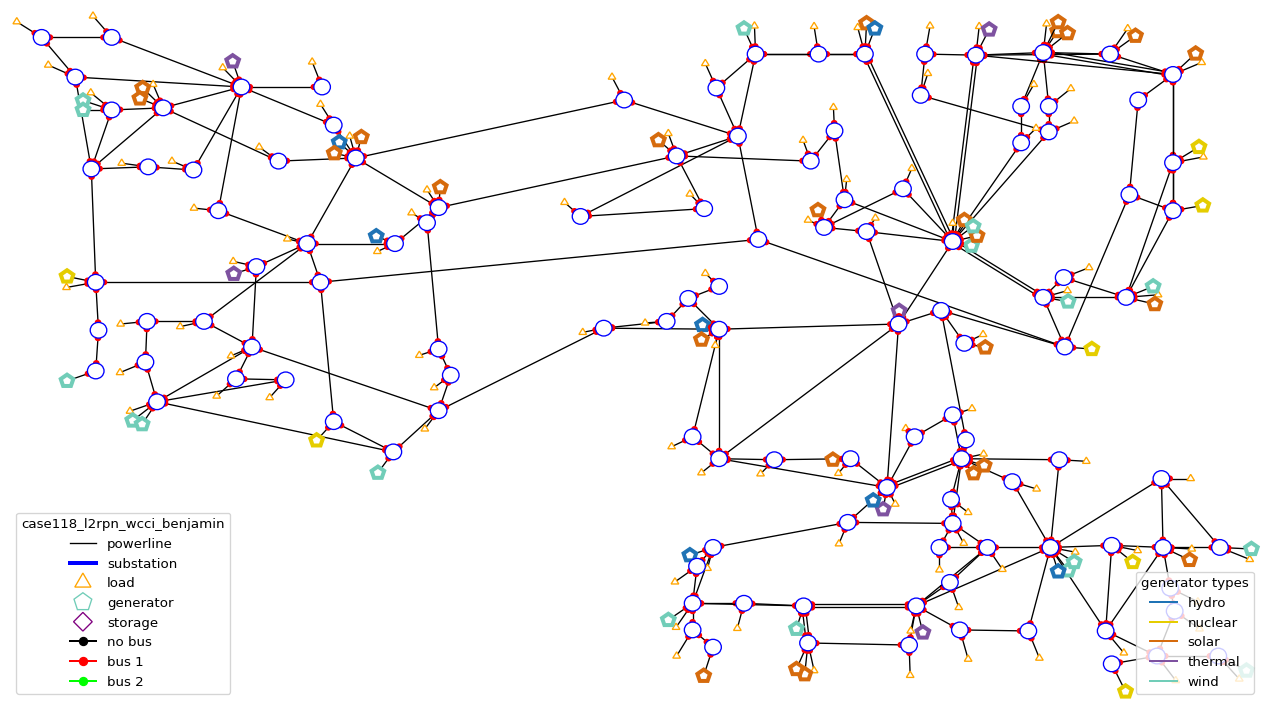

In [9]:
_ = plot_helper.plot_gen_type()

Les générateurs controlables:
<img src="img/gen_controlable.png" width="100%">

Les générateurs éoliens (entouré = gros éoliens = éolien en mer, en tiret = moyen éolien pas entouré = petit éolien ):
<img src="img/gros_eolien.png" width="100%">

Les grosses conso (1 trait max >= 50 MW 2 traits => max >= 100 MW ):
<img src="img/big_loads.png" width="100%">

Un "partionnement" du réseau 
<img src="img/decoupage_du_reseau.png" width="100%">

Les lignes qu'on considère être en "surchageable" (=point faible du réseau, d'un point de vue réseau)
<img src="img/line_in_overload.png" width="100%">

Les lignes qu'on considère être fragiles, qui vont déconnecter (n-1) "facilement" (=lignes plutot vieilles et mal entretenues)
<img src="img/line_attackable.png" width="100%">

# Quelques questions

Si on avait des lignes "à surcharger", on les mettrait ou ?

Ou mettre des batteries ?

Quelles "puissance / capacité" pour les batteries ?

Pour ringo: 12 MW, 24 MWh (2h à pleine puissance)

Une batterie sur le poste 112, 95 (mieux, mais 79 c'est possible aussi), 58 (ou 55), 44 (ou 45, sur le cas particulier présenté elle est mieux en 45 qu'en 44), 76, 41, 22 (surtout si on surchage 18 -> 19 -> 20 -> 21 -> 22)

Batterie bien sur des lignes rouge, avec peu de groupes dans le secteur. La ou il faut les mettre c'est la ou il y a du rouge, et aux endroits ou il y a des problemes.

Il faudrait savoir ou sont les contraintes (ou est-ce qu'on les tape les plus souvent)

Batterie moins cher que l'ecretement, moins cher que les groupes (la batterie devrait être sélectionnée en premier, juste un peu plus cher que la topo => on a plutot envie de dire qu'on ne fait pas de manoeuvres pour 15 mins donc dans ce cas la batterie est "moins chere")

rendement 95% en charge et en décharge, pas de décharge "en énergie"